In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [35]:
diabetes = datasets.load_diabetes()
diabetes.keys()
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

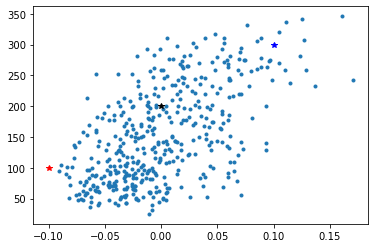

In [36]:
X_p = diabetes.data[:, 2]  # 혈압
X_d = diabetes.target  # 당뇨 진행 정도
plt.plot(X_p, X_d, '.')
plt.plot([-0.1], [100], 'r*')
plt.plot([0], [200], 'k*')
plt.plot([0.1], [300], 'b*')

In [37]:
temp = []
for (i, j) in zip(X_p, X_d):
    r1 = (i+0.1)**2 + (j-100)**2
    r2 = i**2 + (j-200)**2
    r3 = (i-0.1)**2 + (j-300)**2
    m = min(r1, r2, r3)
    temp.append([r1, r2, r3].index(m))

In [38]:
x1 = np.transpose([[i, j] for (t, i, j) in zip(temp, X_p, X_d) if(t == 0)])
x2 = np.transpose([[i, j] for (t, i, j) in zip(temp, X_p, X_d) if(t == 1)])
x3 = np.transpose([[i, j] for (t, i, j) in zip(temp, X_p, X_d) if(t == 2)])
r1 = np.mean(x1[0]), np.mean(x1[1])
r2 = np.mean(x2[0]), np.mean(x2[1])
r3 = np.mean(x3[0]), np.mean(x3[1])

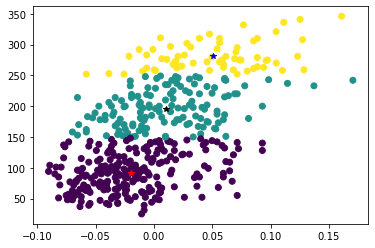

In [39]:
plt.scatter(X_p, X_d, c=temp)
plt.plot(r1[0], r1[1], 'r*')
plt.plot(r2[0], r2[1], 'k*')
plt.plot(r3[0], r3[1], 'b*') # sklearn을 이용하지 않은 clustering

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
data = np.transpose([X_p, X_d])
kmeans.fit(data)

KMeans(n_clusters=3)

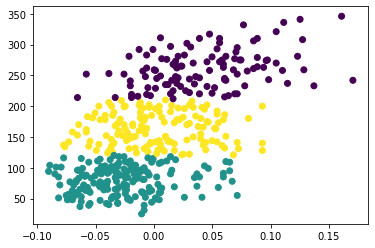

In [41]:
plt.scatter(X_p, X_d, c=kmeans.labels_) # sklearn을 이용한 clustering